In [91]:
# 6.00.2x Problem Set 2: Simulating robots

import math
import random

import ps2_visualize
import pylab

##################
## Comment/uncomment the relevant lines, depending on which version of Python you have
##################

# For Python 3.5:
#from ps2_verify_movement35 import testRobotMovement
# If you get a "Bad magic number" ImportError, you are not using Python 3.5 

# For Python 3.6:
from ps2_verify_movement36 import testRobotMovement
# If you get a "Bad magic number" ImportError, you are not using Python 3.6


# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)


# === Problem 1
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """
        self.width = width                  # Width of the room
        self.height = height                # Height of the room
        self.tiles = {}                     # Dict of tiles in the room
        for m in range(width):              
            for n in range(height):         # Register each single tile in the room as (m,n): True/False
                self.tiles[(m,n)] = False   # Is this tile clean already? Not yet.
    
    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        m = int(pos.getX())           # Convert x pos to int -> m
        n = int(pos.getY())           # Convert y pos to int -> n
        self.tiles[(m,n)] = True      # Set this tile as cleaned / True

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """
        return self.tiles[(m,n)]      # Return True for cleaned, False otherwise
    
    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return self.width * self.height     # Return area of the room, quite simply

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        cleaned = 0                        # How many tiles are cleaned? Let's count
        for k,v in self.tiles.items():     # For each tile in the room
            cleaned += v                   # True converts to 1, False to 0
        return cleaned                     # Return final count = num of cleaned tiles

    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        x = random.random() * self.width    # Pick random float [0, width]
        y = random.random() * self.height   # Pick random float [0, height]
        return Position(x,y)                # Return new random Position within width and height

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        m = int(pos.getX())           # Convert x pos to int -> m
        n = int(pos.getY())           # Convert y pos to int -> n
        return pos.getX() >= 0 and pos.getY() >= 0 and (m,n) in self.tiles


# === Problem 2
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.room  = room                       # Reference to the current room
        self.speed = speed                      # Robot speed
        self.dir   = random.randint(0,360)      # Robot current direction
        self.pos   = room.getRandomPosition()   # Robot placed at random position (in room)
        room.cleanTileAtPosition(self.pos)      # Clean current tile robot is in

    def getRobotPosition(self):
        """
        Return the position of the robot.

        returns: a Position object giving the robot's position.
        """
        return self.pos
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.

        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.dir

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.

        position: a Position object.
        """
        self.pos = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.

        direction: integer representing an angle in degrees
        """
        self.dir = direction

    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!


# === Problem 3
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall, it *instead* chooses a new direction
    randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        current_position = self.getRobotPosition()
        next_position = current_position.getNewPosition(self.dir, self.speed)
        while not self.room.isPositionInRoom(next_position):
            self.setRobotDirection(random.randint(0,360))
            next_position = current_position.getNewPosition(self.dir, self.speed)
        self.setRobotPosition(next_position)
        self.room.cleanTileAtPosition(self.pos)


# Uncomment this line to see your implementation of StandardRobot in action!
# testRobotMovement(StandardRobot, RectangularRoom)


# === Problem 4
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """    
    def coverage(room):
        """ Returns current coverage of the room as % cleaned."""
        return room.getNumCleanedTiles() / room.getNumTiles()
    
    def media(sample):
        """ Returns media of the given sample."""
        return sum(sample) / len(sample)
    steps = []                                      # List to allocate required steps for each trial
    for trial in range(num_trials):                 # Run requested num of trials
        room = RectangularRoom(width, height)       # Instantiate room for current trial
        robots = []                                 # Reset list of robots to populate the room
        steps.append(0)                             # Calc new set of steps for current trial
        for robot in range(num_robots):             # Fill up ranks with requested num of robots
            robots.append(robot_type(room, speed))  # Append new robot to ranks
        while coverage(room) < min_coverage:        # Run simulation up to min_coverage
            steps[-1] += 1                          # Add 1 step to current trial
            for robot in robots:                    # Cicle through robots in the room
                robot.updatePositionAndClean()      # Move robot to new location
                if coverage(room) >= min_coverage:  # Is the room sufficiently cleaned yet?
                    break
    # returns the mean number of time-steps needed to clean the fraction MIN_COVERAGE of the room
    return media(steps)                             # Return result as media of steps required

# Uncomment this line to see how much your simulation takes on average
# print(runSimulation(1, 1.0, 10, 10, 0.75, 30, StandardRobot))

# === Optional: Visualizing Robots
def runVisualSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type, delay):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """    
    def coverage(room):
        """ Returns current coverage of the room as % cleaned."""
        return room.getNumCleanedTiles() / room.getNumTiles()
    
    def media(sample):
        """ Returns media of the given sample."""
        return sum(sample) / len(sample)
    steps = []                                      # List to allocate required steps for each trial
    for trial in range(num_trials):                 # Run requested num of trials
        anim = ps2_visualize.RobotVisualization(num_robots, width, height, delay)
        room = RectangularRoom(width, height)       # Instantiate room for current trial
        robots = []                                 # Reset list of robots to populate the room
        steps.append(0)                             # Calc new set of steps for current trial
        for robot in range(num_robots):             # Fill up ranks with requested num of robots
            robots.append(robot_type(room, speed))  # Append new robot to ranks
        while coverage(room) < min_coverage:        # Run simulation up to min_coverage
            steps[-1] += 1                          # Add 1 step to current trial
            anim.update(room, robots)
            for robot in robots:                    # Cicle through robots in the room
                robot.updatePositionAndClean()      # Move robot to new location
                if coverage(room) >= min_coverage:  # Is the room sufficiently cleaned yet?
                    break
    # returns the mean number of time-steps needed to clean the fraction MIN_COVERAGE of the room
    return media(steps)                             # Return result as media of steps required


# === Problem 5
class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        current_position = self.getRobotPosition()
        self.setRobotDirection(random.randint(0,360))
        next_position = current_position.getNewPosition(self.getRobotDirection(), self.speed)
        while not self.room.isPositionInRoom(next_position):
            self.setRobotDirection(random.randint(0,360))
            next_position = current_position.getNewPosition(self.dir, self.speed)
        self.setRobotPosition(next_position)
        self.room.cleanTileAtPosition(self.pos)


def showPlot1(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print("Plotting", num_robots, "robots...")
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

    
def showPlot2(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300//width
        print("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(runSimulation(2, 1.0, width, height, 0.8, 200, StandardRobot))
        times2.append(runSimulation(2, 1.0, width, height, 0.8, 200, RandomWalkRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


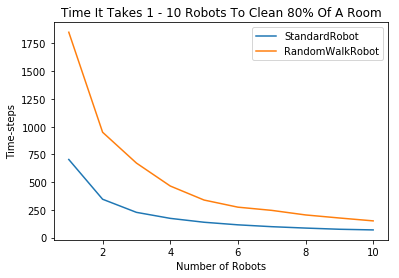

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 20 by height: 15
Plotting cleaning time for a room of width: 25 by height: 12
Plotting cleaning time for a room of width: 50 by height: 6


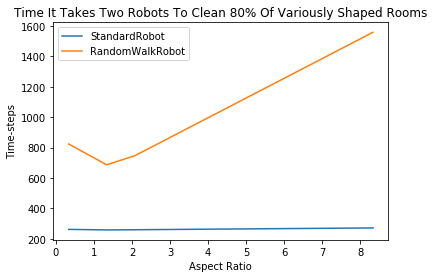

In [100]:
# === Problem 6
# NOTE: If you are running the simulation, you will have to close it 
# before the plot will show up.

#
# 1) Write a function call to showPlot1 that generates an appropriately-labeled
#     plot.
#
showPlot1("Time It Takes 1 - 10 Robots To Clean 80% Of A Room", "Number of Robots", "Time-steps")
#

#
# 2) Write a function call to showPlot2 that generates an appropriately-labeled
#     plot.
#
showPlot2("Time It Takes Two Robots To Clean 80% Of Variously Shaped Rooms", "Aspect Ratio", "Time-steps")
#


In [11]:
print("\nTesting:   Rectangular Room")
print("----------------------------")

p1 = Position(2,17)
p2 = Position(0,0)
p3 = Position(21,27)
p4 = Position(19,31)
p5 = Position(-0.10, 0.00)
p6 = Position(0.00, -0.10)
room1 = RectangularRoom(20,30)
room2 = RectangularRoom(30,60)

print("\nTesting:   room.cleanTileAtPosition & room.isTileCleaned")
print(room1.isTileCleaned(p1.getX(),p1.getY()) == False)
print(room1.isTileCleaned(p2.getX(),p2.getY()) == False)
room1.cleanTileAtPosition(p1)
print(room1.isTileCleaned(p1.getX(),p1.getY()) == True)
print(room1.isTileCleaned(p1.getX(),p2.getY()) == False)
print(room2.isTileCleaned(p1.getX(),p1.getY()) == False)
room2.cleanTileAtPosition(p4)
print(room2.isTileCleaned(p4.getX(),p4.getY()) == True)

print("\nTesting:   room.isPositionInRoom")
print(room1.isPositionInRoom(p1) == True)
print(room1.isPositionInRoom(p2) == True)
print(room1.isPositionInRoom(p3) == False)
print(room1.isPositionInRoom(p4) == False)
print(room2.isPositionInRoom(p4) == True)
print(room1.isPositionInRoom(p5) == False)
print(room1.isPositionInRoom(p6) == False)

print("\nTesting:   room.getNumTiles")
print(room1.getNumTiles() == 20*30)
print(room2.getNumTiles() == 30*60)

print("\nTesting:   room.getNumCleanedTiles")
print(room1.getNumCleanedTiles() == 1)
room2.cleanTileAtPosition(p1)
room2.cleanTileAtPosition(p2) # p3 is still unclean
print(room2.getNumCleanedTiles() == 3)

print("\nTesting:   room.getRandomPosition")
random.seed(0)
print(str(room1.getRandomPosition()) == str(Position(16.89, 22.74)))
print(str(room1.getRandomPosition()) == str(Position(8.41, 7.77)))
print(str(room2.getRandomPosition()) == str(Position(15.34, 24.30)))


Testing:   Rectangular Room
----------------------------

Testing:   room.cleanTileAtPosition & room.isTileCleaned
True
True
True
True
True
True

Testing:   room.isPositionInRoom
True
True
True
True
True
True
True

Testing:   room.getNumTiles
True
True

Testing:   room.getNumCleanedTiles
True
True

Testing:   room.getRandomPosition
True
True
True


In [106]:
print("\nTesting:   Robot")
print("----------------------------")

random.seed(0)
room1 = RectangularRoom(20,30)
room2 = RectangularRoom(30,60)
room3 = RectangularRoom(40,20)

print("\nTesting:   room not cleaned")
print(room1.getNumCleanedTiles() == 0)
print(room2.getNumCleanedTiles() == 0)
print(room3.getNumCleanedTiles() == 0)

r1 = Robot(room1, 0.10)
r2 = Robot(room2, 0.20)
r3 = Robot(room3, 0.30)

print("\nTesting:   robot.getRobotPosition")
print(str(r1.getRobotPosition()) == str(Position(15.16, 12.62)))
print(str(r2.getRobotPosition()) == str(Position(28.96, 29.16)))
print(str(r3.getRobotPosition()) == str(Position(38.71, 7.16)))

print("\nTesting:   robot.getRobotDirection")
print(r1.getRobotDirection() == 197)
print(r2.getRobotDirection() == 132)
print(r3.getRobotDirection() == 155)

print("\nTesting:   robot cleaned initial tile")
print(room1.getNumCleanedTiles() == 1)
print(room2.getNumCleanedTiles() == 1)
print(room3.getNumCleanedTiles() == 1)
m,n = int(r1.getRobotPosition().getX()), int(r1.getRobotPosition().getY())
print(room1.isTileCleaned(m, n))
m,n = int(r2.getRobotPosition().getX()), int(r2.getRobotPosition().getY())
print(room2.isTileCleaned(m, n))
m,n = int(r3.getRobotPosition().getX()), int(r3.getRobotPosition().getY())
print(room3.isTileCleaned(m, n))


Testing:   room not cleaned
True
True
True

Testing:   robot.getRobotPosition
True
True
True

Testing:   robot.getRobotDirection
True
True
True

Testing:   robot cleaned initial tile
True
True
True
True
True
True


In [22]:
print("\nTesting:   Standard Robot")
print("----------------------------")
# random.seed(0)
room1 = RectangularRoom(10,20)
room2 = RectangularRoom(30,60)
room3 = RectangularRoom(40,20)

robot1 = StandardRobot(room1, 0.10)

print("\nTesting:   updatePositionAndClean")
print("Initial direction:", robot1.getRobotDirection())
for i in range(20):
    robot1.updatePositionAndClean()


Testing:   Standard Robot
----------------------------

Testing:   updatePositionAndClean
Initial direction: 258
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good
All good


In [40]:
# def runSimulation(num_robots, speed, width, height, min_coverage, num_trials, robot_type):
speed = 1.0
trials = 300
robot = StandardRobot

# One robot takes around 150 clock ticks to completely clean a 5x5 room.
print("1 robot, 5x5 room, 100%: ", runSimulation(1, speed, 5, 5, 1.00, trials, robot) / 150)

# One robot takes around 190 clock ticks to clean 75% of a 10x10 room.
print("1 robot, 10x10 room, 75%:", runSimulation(1, speed, 10, 10, 0.75, trials, robot) / 190)

# One robot takes around 310 clock ticks to clean 90% of a 10x10 room.
print("1 robot, 10x10 room, 90%:", runSimulation(1, speed, 10, 10, 0.90, trials, robot) / 310)

# One robot takes around 3322 clock ticks to completely clean a 20x20 room.
print("1 robot, 10x10 room, 90%:", runSimulation(1, speed, 20, 20, 1.00, trials, robot) / 3322)

# Three robots take around 1105 clock ticks to completely clean a 20x20 room.
print("3 robot, 10x10 room, 90%:", runSimulation(3, speed, 20, 20, 0.90, trials, robot) / 1105)

1 robot, 5x5 room, 100%:  0.6319111111111111
1 robot, 10x10 room, 75%: 0.7685438596491229
1 robot, 10x10 room, 90%: 0.781258064516129
1 robot, 10x10 room, 90%: 0.8582841661649608
3 robot, 10x10 room, 90%: 0.8969170437405731


In [54]:
trials = 300
robot = StandardRobot

print("Testing 1 robot at 1.0 speed cleaning 78% of a 5x5 room:  ", runSimulation(1, 1.0, 5, 5, 0.78, trials, robot) //2)
print("Testing 1 robot at 1.0 speed cleaning 96% of a 10x12 room.:", runSimulation(1, 1.0, 10, 12, 0.96, trials, robot) //2)
print("Testing 1 robot at 2.0 speed cleaning 96% of a 10x12 room:", runSimulation(1, 2.0, 10, 12, 0.96, trials, robot) //2)
print("Testing 2 robots at 1.0 speed cleaning 80% of a 8x8 room:", runSimulation(2, 1.0, 8, 8, 0.80, trials, robot) //2)
print("Testing 2 robots at 3.0 speed cleaning 98% of a 15x13 room", runSimulation(2, 3.0, 15, 13, 0.98, trials, robot) //2)

Testing 1 robot at 1.0 speed cleaning 78% of a 5x5 room:   19.0
Testing 1 robot at 1.0 speed cleaning 96% of a 10x12 room.: 209.0
Testing 1 robot at 2.0 speed cleaning 96% of a 10x12 room: 204.0
Testing 2 robots at 1.0 speed cleaning 80% of a 8x8 room: 27.0
Testing 2 robots at 3.0 speed cleaning 98% of a 15x13 room 207.0


In [89]:
delay = 0.1
robot = StandardRobot
runVisualSimulation(10, 1.0, 25, 25, 1.00, 1, robot, delay)

519.0

In [96]:
delay = 0.1
robot = RandomWalkRobot
runVisualSimulation(10, 1.0, 25, 25, 1.00, 1, robot, delay)

1323.0

In [97]:
delay = 0.1
robot = StandardRobot
runVisualSimulation(10, 1.0, 50, 6, 1.00, 1, robot, delay)

162.0

In [93]:
delay = 0.1
robot = RandomWalkRobot
runVisualSimulation(10, 1.0, 50, 6, 1.00, 1, robot, delay)

1102.0

In [84]:
trials = 30
robot = StandardRobot
print("Testing   1 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(1, 1.0, 25, 25, 1.00, trials, robot) // 2)
print("Testing  10 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(10, 1.0, 25, 25, 1.00, trials, robot) // 2)
print("Testing 100 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(100, 1.0, 25, 25, 1.00, trials, robot) // 2)

print("Testing   1 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(1, 1.0, 25, 25, 0.50, trials, robot) // 2)
print("Testing  10 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(10, 1.0, 25, 25, 0.50, trials, robot) // 2)
print("Testing 100 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(100, 1.0, 25, 25, 0.50, trials, robot) // 2)

Testing   1 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room:   2546.0
Testing  10 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room:   244.0
Testing 100 Standard Robot at 1.0 speed cleaning 100% of a 25x25 room:   24.0
Testing   1 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:   234.0
Testing  10 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:   23.0
Testing 100 Standard Robot at 1.0 speed cleaning 50% of a 25x25 room:   2.0


In [85]:
trials = 30
robot = RandomWalkRobot
print("Testing   1 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(1, 1.0, 25, 25, 1.00, trials, robot) // 2)
print("Testing  10 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(10, 1.0, 25, 25, 1.00, trials, robot) // 2)
print("Testing 100 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room: ", runSimulation(100, 1.0, 25, 25, 1.00, trials, robot) // 2)

print("Testing   1 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(1, 1.0, 25, 25, 0.50, trials, robot) // 2)
print("Testing  10 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(10, 1.0, 25, 25, 0.50, trials, robot) // 2)
print("Testing 100 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:  ", runSimulation(100, 1.0, 25, 25, 0.50, trials, robot) // 2)

Testing   1 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room:   7441.0
Testing  10 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room:   714.0
Testing 100 Random Walk Robot at 1.0 speed cleaning 100% of a 25x25 room:   53.0
Testing   1 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:   685.0
Testing  10 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:   48.0
Testing 100 Random Walk Robot at 1.0 speed cleaning 50% of a 25x25 room:   2.0
